<a href="https://colab.research.google.com/github/YassineZITI/Chess_Analysis/blob/main/Chess_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

in this notebook i'm gonna work with the lichess API because i have an account there and i've played a lot of games there.

# Preparing the Lichess API Package and token.

In [ ]:
!pip install berserk --quiet


In [ ]:
import berserk 

In [ ]:
API_TOKEN='lip_3gD7WOiSA33fLaJoSojZ'
session = berserk.TokenSession(API_TOKEN)
client = berserk.Client(session=session)

In [ ]:
##first try of the API 
## disply my stats in the game 
client.users.get_public_data('yaS1Sine')

{'completionRate': 90,
 'count': {'ai': 106,
  'all': 9172,
  'bookmark': 5,
  'draw': 412,
  'drawH': 405,
  'import': 0,
  'loss': 4300,
  'lossH': 4230,
  'me': 0,
  'playing': 0,
  'rated': 9003,
  'win': 4460,
  'winH': 4431},
 'createdAt': datetime.datetime(2020, 3, 12, 14, 46, 27, 378000, tzinfo=datetime.timezone.utc),
 'id': 'yas1sine',
 'online': False,
 'perfs': {'atomic': {'games': 4,
   'prog': 0,
   'prov': True,
   'rating': 1375,
   'rd': 237},
  'blitz': {'games': 4846, 'prog': -2, 'rating': 2017, 'rd': 45},
  'bullet': {'games': 3536, 'prog': 22, 'rating': 1901, 'rd': 54},
  'chess960': {'games': 28, 'prog': -45, 'rating': 1617, 'rd': 106},
  'classical': {'games': 15,
   'prog': -4,
   'prov': True,
   'rating': 1690,
   'rd': 140},
  'correspondence': {'games': 1,
   'prog': 0,
   'prov': True,
   'rating': 1408,
   'rd': 293},
  'crazyhouse': {'games': 4,
   'prog': 0,
   'prov': True,
   'rating': 1599,
   'rd': 200},
  'kingOfTheHill': {'games': 13,
   'prog': 39,

# Guetting basic information about my skills in chess

## My Elo ratings

In [ ]:
yassine=client.users.get_public_data('yaS1Sine')

In [ ]:
stats=yassine['perfs']
stats

{'atomic': {'games': 4, 'prog': 0, 'prov': True, 'rating': 1375, 'rd': 236},
 'blitz': {'games': 4845, 'prog': -4, 'rating': 2011, 'rd': 45},
 'bullet': {'games': 3536, 'prog': 22, 'rating': 1901, 'rd': 54},
 'chess960': {'games': 28, 'prog': -45, 'rating': 1617, 'rd': 106},
 'classical': {'games': 15,
  'prog': -4,
  'prov': True,
  'rating': 1690,
  'rd': 140},
 'correspondence': {'games': 1,
  'prog': 0,
  'prov': True,
  'rating': 1408,
  'rd': 293},
 'crazyhouse': {'games': 4,
  'prog': 0,
  'prov': True,
  'rating': 1599,
  'rd': 200},
 'kingOfTheHill': {'games': 13,
  'prog': 39,
  'prov': True,
  'rating': 1571,
  'rd': 150},
 'puzzle': {'games': 3592, 'prog': 0, 'rating': 2184, 'rd': 68},
 'racingKings': {'games': 1,
  'prog': 0,
  'prov': True,
  'rating': 1275,
  'rd': 291},
 'rapid': {'games': 497, 'prog': 34, 'rating': 2030, 'rd': 50},
 'storm': {'runs': 75, 'score': 35},
 'streak': {'runs': 4, 'score': 28},
 'ultraBullet': {'games': 42,
  'prog': -21,
  'prov': True,
  'r

In [ ]:
## elo for each variant
for variant in stats:
  ##we dont check the variants i dont play
  if 'games' in stats[variant]:
    games=stats[variant]['games']
    if games >100:
      print('My {} rating is: {}'.format(variant,stats[variant]['rating']))
  

My puzzle rating is: 2184
My blitz rating is: 2011
My bullet rating is: 1901
My rapid rating is: 2030


in fact i'm a good chess player ,my elo crossed the 2000 elo bar

## auther info

In [ ]:
## when i start playing chess on lichess
print(yassine['createdAt'])

2020-03-12 14:46:27.378000+00:00


In [ ]:
## my winnig rate
print('i played {} games on lichess'.format(yassine['count']['all']))
win_rate=round(yassine['count']['win']/yassine['count']['all'],2)
lose_rate=round(yassine['count']['loss']/yassine['count']['all'],2)
draw_rate=round(yassine['count']['draw']/yassine['count']['all'],2)
print('i won {}% of my games'.format(100*win_rate))
print('i lost {}% of my games'.format(100*lose_rate))
print('i drawn {}% of my games'.format(100*draw_rate))



i played 9171 games on lichess
i won 49.0% of my games
i lost 47.0% of my games
i drawn 4.0% of my games


In [ ]:
## what is the time spent on playing chess
days=round(yassine['playTime']['total']/(60*60*24))
print('time spent playing is:',days,'days.')

time spent playing is: 29 days.


# Loading And Preparing Data For Analysis


## Loading my games

In [ ]:
from datetime import datetime
start = berserk.utils.to_millis(datetime(2020, 10, 25))
end = berserk.utils.to_millis(datetime(2021, 10, 25))
client.games.export_by_player('yaS1Sine', since=start, until=end)
games = list(client.games.export_by_player('yaS1Sine', since=start, until=end,max=5000, moves=True, tags=False, evals=True, opening=True))

In [ ]:
games[5]

{'clock': {'increment': 2, 'initial': 180, 'totalTime': 260},
 'createdAt': datetime.datetime(2021, 11, 1, 21, 39, 5, 471000, tzinfo=datetime.timezone.utc),
 'id': 'lmWE4bZ7',
 'lastMoveAt': datetime.datetime(2021, 11, 1, 21, 46, 18, 939000, tzinfo=datetime.timezone.utc),
 'moves': 'd4 d5 c4 dxc4 e4 Nf6 Nc3 e6 Bxc4 Bb4 e5 Bxc3+ bxc3 Ne4 Qd3 Ng5 Ba3 Nd7 f4 c6 fxg5 b5 Bb3 Nxe5 Qe4 Ng6 Qxc6+ Bd7 Qe4 Qa5 Bb4 Qc7 Nf3 a5 Qxa8+ Bc8 Bc5 Nf4 Qa7 Bb7 O-O Ne2+ Kh1 Nf4 Qb6 Qb8 Bd6 Qc8 Bxf4 O-O Qc5 Qa8 Bd6 Rc8 Qxb5 Bxf3 Rxf3 a4 Qxa4 Qe4 Raf1 Qg6 Bf4',
 'opening': {'eco': 'D20',
  'name': "Queen's Gambit Accepted: Central Variation, Alekhine System",
  'ply': 6},
 'perf': 'blitz',
 'players': {'black': {'rating': 1774,
   'ratingDiff': -2,
   'user': {'id': 'hassansadki10', 'name': 'hassansadki10'}},
  'white': {'rating': 2018,
   'ratingDiff': 2,
   'user': {'id': 'yas1sine', 'name': 'yaS1Sine'}}},
 'rated': True,
 'speed': 'blitz',
 'status': 'outoftime',
 'tournament': 'k7MZJ49E',
 'variant': 'st

In [ ]:
# preserve only blitz and rapid games
my_games=[i for i in games if (i['perf']=='blitz' or i['perf']=='rapid') and i['variant']=='standard']



we gonna use only blitz and rapid games because usually in bullet there is a lot of blunders due to time pressure(bullet games played under 2 min for each player)

In [ ]:
len(my_games)

3130

In [ ]:
my_games[0]

{'analysis': [{'eval': 0},
  {'best': 'e7e6',
   'eval': 70,
   'judgment': {'comment': 'Inaccuracy. e6 was best.', 'name': 'Inaccuracy'},
   'variation': 'e6 c4 d5 Nf3 Nf6 cxd5 exd5 Bf4 c5 Nc3'},
  {'eval': 26},
  {'best': 'e7e5',
   'eval': 94,
   'judgment': {'comment': 'Inaccuracy. e5 was best.', 'name': 'Inaccuracy'},
   'variation': 'e5 e3 g6 Nc3 Nf6 Nf3 Qe7 e4 Bg7 d5'},
  {'eval': 72},
  {'eval': 72},
  {'eval': 43},
  {'eval': 85},
  {'eval': 71},
  {'eval': 87},
  {'eval': 40},
  {'best': 'f6g4',
   'eval': 102,
   'judgment': {'comment': 'Inaccuracy. Ng4 was best.', 'name': 'Inaccuracy'},
   'variation': 'Ng4 Bg5 h6 Bh4 O-O h3 Nf6 f3 e5 d5'},
  {'eval': 75},
  {'eval': 72},
  {'eval': 94},
  {'eval': 120},
  {'best': 'g2g4',
   'eval': 62,
   'judgment': {'comment': 'Inaccuracy. g4 was best.', 'name': 'Inaccuracy'},
   'variation': 'g4 c6 Ng3 Ne8 Qd2 b5 cxb5 cxd5 exd5 f5 Bg5 Nf6 Be2 Kh8'},
  {'eval': 85},
  {'best': 'd1d2',
   'eval': -49,
   'judgment': {'comment': 'Mistake.

## Create a Data Frame with my games

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# filtering the data
# filtering games played with stockfich
def filter_stockfish(my_games):
  my_games1=[]
  for i in my_games:
    try :
      i['players']['black']['user']['id']
      i['players']['white']['user']['id']
      my_games1.append(i)
    except (AttributeError,KeyError):
      continue
  return my_games1
# filtering games doesn't start
def filter_incomplete_games(my_games):
  my_games1=[]
  for i in my_games:
    try :
      i['opening']['name']
      my_games1.append(i)
    
    except (AttributeError,KeyError):
      continue
  return my_games1
# filtering
my_games=filter_stockfish(my_games)
my_games=filter_incomplete_games(my_games)

In [ ]:
# my_rating  my_color opponent_rating opponent_country data
my_rating=[]
my_color=[]
opponent_rating=[]
opponent_id=[]
opening=[]
Date=[]
game_id=[]
moves=[]
speed=[]
game_ending=[]
for i in my_games:
  Date.append(i['createdAt'].strftime('%m/%d/%Y'))
  game_id.append(i['id'])
  moves.append(i['moves'])
  speed.append(i['speed'] )
  game_ending.append(i['status'])
  opening.append(i['opening']['name'])
  if i['players']['black']['user']['id']=='yas1sine':
    my_color.append('black')
    my_rating.append(i['players']['black']['rating'])
    opponent_rating.append(i['players']['white']['rating'])
    opponent_id.append(i['players']['white']['user']['id'])
  if i['players']['white']['user']['id']=='yas1sine':
    my_color.append('white')
    my_rating.append(i['players']['black']['rating'])
    opponent_rating.append(i['players']['white']['rating'])
    opponent_id.append(i['players']['black']['user']['id'])



In [ ]:
## winner tournament
winner=[]
tournament=[]
for i in my_games:
  if 'winner' in i:
    winner.append(i['winner'])
  else:
    winner.append(np.nan)
  if 'tournament' in i:
    tournament.append(True)
  else:
    tournament.append(False)

In [ ]:
#add my opponents countries
country=[]

for player in opponent_id:
  info=client.users.get_public_data(player)

  if 'profile' in info :
    country.append(info.get('profile').get('country'))
    
    
  else :
    country.append(np.nan)

In [ ]:
len(country)

3097

## Add Camputer analysis to my games if available

In [ ]:

analysis=[]
accuracy=[]
inaccuracy=[]
mistake=[]
blunder=[]
for i in my_games:
  if 'analysis' in i:
  
      



  

    # analysis
    cpl=''
    eval=i['analysis']
    for j in eval:
      if type(j)==dict:
        if 'eval'in j:
          cpl+=str(j['eval'])+' '
    analysis.append(cpl)

  

    if i['players']['black']['user']['id']=='yas1sine':
      accuracy.append(i['players']['black']['analysis']['acpl'])
      inaccuracy.append(i['players']['black']['analysis']['inaccuracy'])
      mistake.append(i['players']['black']['analysis']['mistake'])
      blunder.append(i['players']['black']['analysis']['blunder'])

    else:
      accuracy.append(i['players']['white']['analysis']['acpl'])
      inaccuracy.append(i['players']['white']['analysis']['inaccuracy'])
      mistake.append(i['players']['white']['analysis']['mistake'])
      blunder.append(i['players']['white']['analysis']['blunder'])
  else:
    analysis.append(np.nan)
    accuracy.append(np.nan)
    inaccuracy.append(np.nan)
    mistake.append(np.nan)
    blunder.append(np.nan)



In [ ]:
data={'game_id':game_id,
      'Date':Date,
      'tournament':tournament,
      'speed':speed,
      'opening':opening,
      'moves':moves,
      'my_color':my_color,
      'my_rating':my_rating,
      'opponent_id':opponent_id,
      'opponent_rating':opponent_rating,
      'game_ending':game_ending,
      'winner':winner,
      'opponent_country':country,
      'analysis':analysis,
      'accuracy':accuracy,
      'inaccuracy':inaccuracy,
      'mistake':mistake,
      'blunder':blunder}

In [ ]:
my_chess=pd.read_csv('chess_games.csv')

In [ ]:
my_chess=pd.DataFrame(data)

In [ ]:
my_chess['Date']=pd.to_datetime(my_chess['Date'],format='%m/%d/%Y')
my_chess.head(2)

,game_id,Date,tournament,speed,opening,moves,my_color,my_rating,opponent_id,opponent_rating,game_ending,winner,opponent_country,analysis,accuracy,inaccuracy,mistake,blunder
0,jgm3Grn6,2021-11-06,False,blitz,Modern Defense: Kotov Variation,d4 d6 c4 g6 Nc3 Bg7 e4 Nc6 Be3 Nf6 Nge2 O-O h3...,white,2034,ps430,2011,resign,white,NaN,0 70 26 94 72 72 43 85 71 87 40 102 75 72 94 1...,48.0,5.0,2.0,1.0
1,SvDJxIcM,2021-11-04,True,blitz,"Grünfeld Defense: Exchange Variation, Classica...",d4 Nf6 c4 g6 Nc3 d5 cxd5 Nxd5 e4 Nxc3 bxc3 Bg7...,white,2002,mwafakalhaswa,2017,mate,black,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
my_chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_id           3097 non-null   object 
 1   Date              3097 non-null   object 
 2   tournament        3097 non-null   bool   
 3   speed             3097 non-null   object 
 4   opening           3097 non-null   object 
 5   moves             3097 non-null   object 
 6   my_color          3097 non-null   object 
 7   my_rating         3097 non-null   int64  
 8   opponent_id       3097 non-null   object 
 9   opponent_rating   3097 non-null   int64  
 10  game_ending       3097 non-null   object 
 11  winner            2912 non-null   object 
 12  opponent_country  1128 non-null   object 
 13  analysis          443 non-null    object 
 14  accuracy          443 non-null    float64
 15  inaccuracy        443 non-null    float64
 16  mistake           443 non-null    float64


In [ ]:
my_chess.to_csv('chess_games.csv',index=False)

# Analysis And visualisations

### Importing necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

### my rating developpement over the time

In [ ]:
df=my_chess

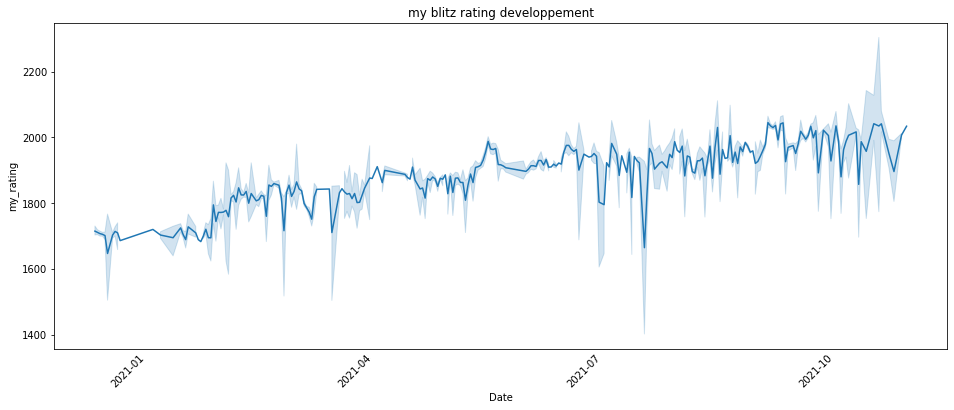

In [ ]:
###blitz rating
blitz=df[df['speed']=='blitz'][['Date','my_rating']].sort_values('Date')

fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=blitz, x='Date', y='my_rating')
plt.title('my blitz rating developpement')
every_nth = 3
ax.tick_params(axis='x', which='both',rotation=45, length=0)
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


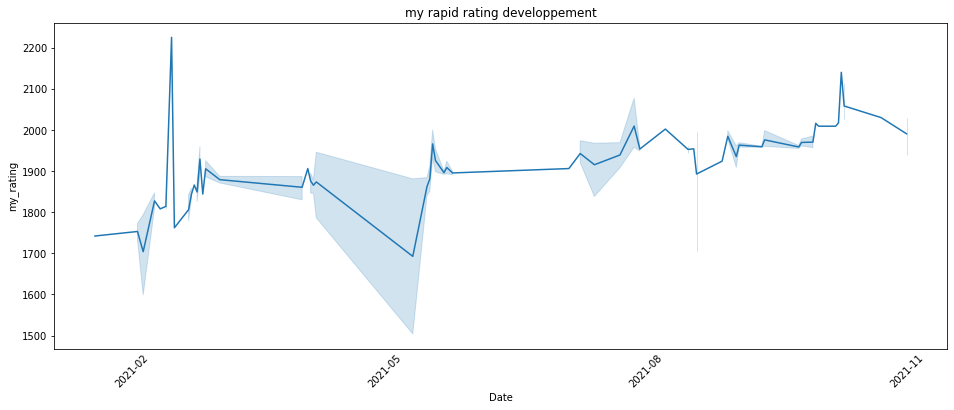

In [ ]:
###rapid rating
###blitz rating
rapid=df[df['speed']=='rapid'][['Date','my_rating']].sort_values('Date')
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=rapid, x='Date', y='my_rating')
plt.title('my rapid rating developpement')

every_nth = 3
ax.tick_params(axis='x', which='both',rotation=45, length=0)
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

my rapid rating did not change between mars and jully because i stopped playin rapid games.

### my openings and with wich one i win more

In [ ]:
df['me_wining']=df['my_color']==df['winner']

In [ ]:
data=df.groupby(['opening'])['me_wining'].mean()
data

opening
Alekhine Defense: Maróczy Variation                  0.500000
Anderssen's Opening                                  1.000000
Benko Gambit                                         0.600000
Benoni Defense                                       0.000000
Benoni Defense: Classical Variation                  1.000000
                                                       ...   
Zukertort Opening                                    0.400000
Zukertort Opening: Lemberger Gambit                  1.000000
Zukertort Opening: Old Indian Attack                 0.000000
Zukertort Opening: Pirc Invitation                   0.521739
Zukertort Opening: Queenside Fianchetto Variation    1.000000
Name: me_wining, Length: 260, dtype: float64

let's remove the openings wich i dont play that much maybe an opponent forces me to play it

In [ ]:
data=df.copy()
data.opening=data.opening.str.split(':').str[0]

data=data.groupby(['opening'])['me_wining'].agg(['mean','count']).sort_values('count',ascending=False)[:20]



data.reset_index(inplace=True)
data


,opening,mean,count
0,Pirc Defense,0.504013,623
1,Queen's Gambit Declined,0.425963,493
2,King's Indian Defense,0.464912,342
3,Indian Defense,0.467005,197
4,Philidor Defense,0.555556,162
5,Slav Defense,0.478261,161
6,Queen's Gambit Accepted,0.398438,128
7,Benoni Defense,0.467532,77
8,Modern Defense,0.447761,67
9,Rat Defense,0.363636,55


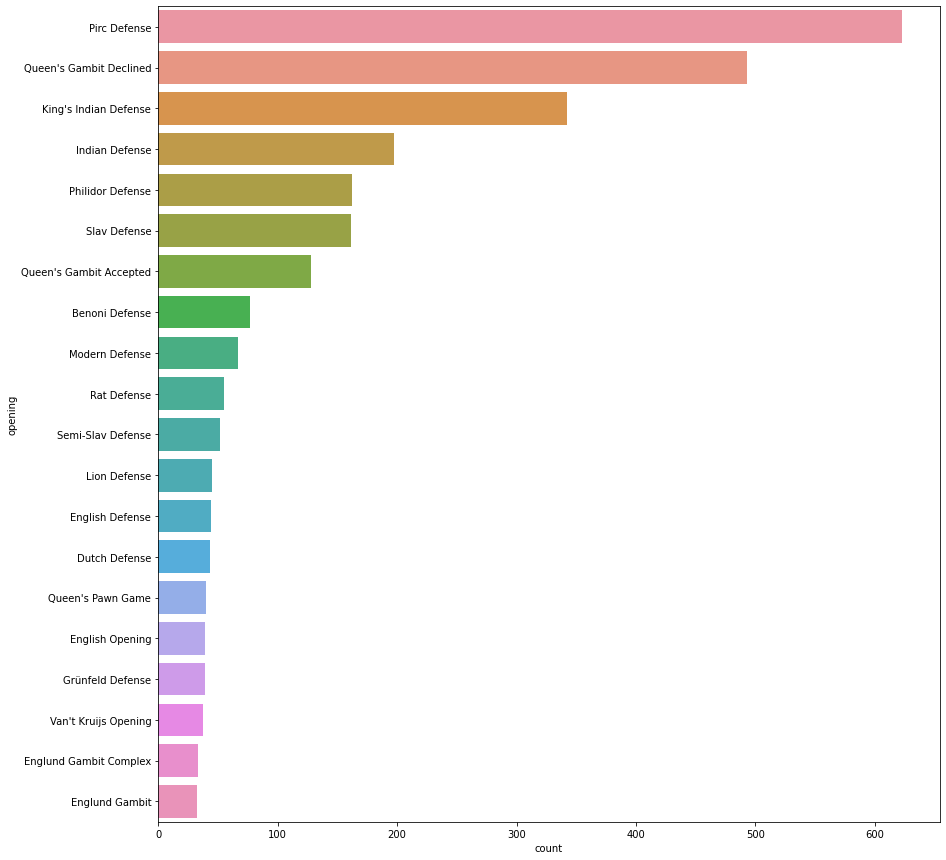

In [ ]:
##opening by count
plt.figure(figsize=(14,15))
sns.barplot(y='opening',x='count',data=data)


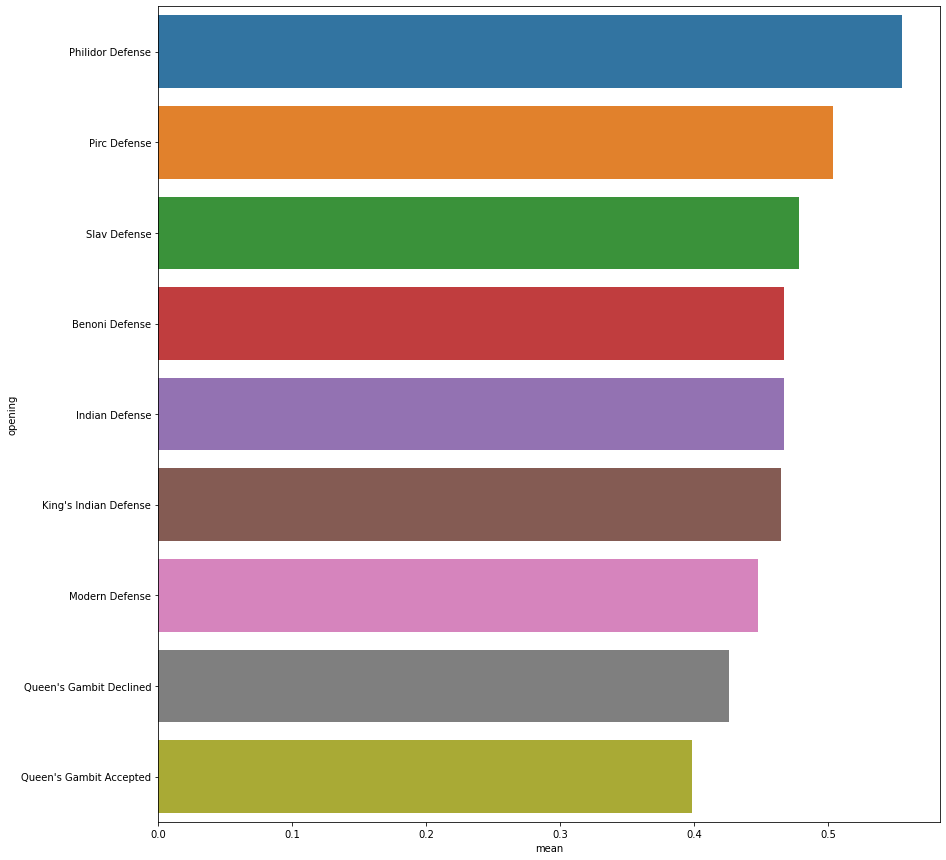

In [ ]:
data=data[:9].sort_values('mean',ascending=False)
plt.figure(figsize=(14,15))
sns.barplot(y='opening',x='mean',data=data)

it looks like i'm more accurate when playing with black because all the high opening in this graph i play them as black

###  Accuracy 

In [ ]:
## first let' retrive the accuracy data
## because i didn't analys each game i played we will visualize
## the average accuracy each and we hope that i analysed at least one game each month
look_up = {'1': 'Jan', '2': 'Feb', '3': 'Mar', '4': 'Apr', '5': 'May',
            '6': 'Jun', '7': 'Jul', '8': 'Aug', '9': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
def month(row):
  date=str(row)
  return look_up[date]
data=df.copy()
data=data[data['Date'].dt.year==2021].sort_values('Date')
data['month']=data['Date'].dt.month
data=data.groupby(['month'])[['accuracy']].mean().reset_index()
data['month'] = data['month'].apply(month)
data

,month,accuracy
0,Jan,68.333333
1,Feb,58.946429
2,Mar,69.130435
3,Apr,60.302326
4,May,62.202532
5,Jun,62.909091
6,Jul,69.888889
7,Aug,69.866667
8,Sep,68.153846
9,Oct,58.600000


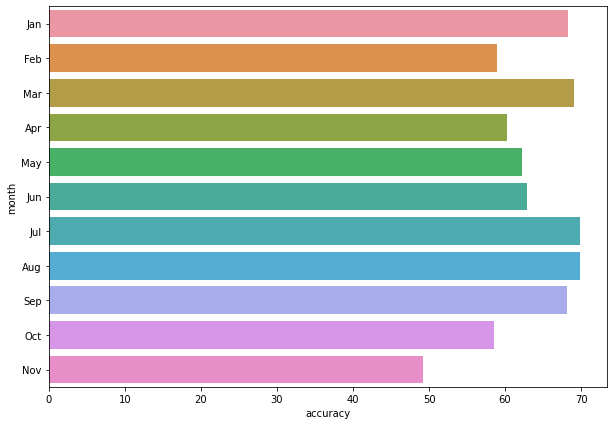

In [ ]:
### lichess call accuracy acpl"Average centipawn loss".
### if we divide it by 100 will give us the averge pawn we lose every move.
plt.figure(figsize=(10,7))
sns.barplot(x='accuracy',y='month',data=data)

we saw erlier that my rating increased a lot this year and here we can see that lately i'm getting more accurate.**(the decrease in the accuracy mean's i'm making less bad moves)**

### opponents on the map
we will plot a choropleth map for visualizing how many opponents i played in each country.

In [ ]:
df.opponent_country.head()

0     MA
1    NaN
2    NaN
3     MA
4     MA
Name: opponent_country, dtype: object

In [ ]:
# in my geojson file the countries presented by name
# let's transform our dataframe to the same.
from bs4 import BeautifulSoup
import requests
html=requests.get('https://www.iban.com/country-codes')
soup=BeautifulSoup(html.text,'html.parser')
table=soup.find('table')
mapping=dict()
for i in soup.find_all('tr')[1:]:
  cols=i.find_all('td')
  mapping[cols[1].text]=cols[0].text

In [ ]:
df.opponent_country=df.opponent_country.map(mapping)
df.opponent_country

0       Morocco
1           NaN
2           NaN
3       Morocco
4       Morocco
         ...   
3091    Ukraine
3092     Jordan
3093    Morocco
3094    Morocco
3095        NaN
Name: opponent_country, Length: 3096, dtype: object

In [ ]:
#geojson file 

import json
world_geo=r'world_countries.json'

# open the json file - json.load() methods returns a python dictionary
with open(world_geo) as geo_file:
    countries_json = json.load(geo_file)

In [ ]:
# prepare the data for viz
data=df.groupby(['opponent_country']).size().reset_index()
data.columns=['country','count']
data1=data.copy()
for i in countries_json['features']:
  if i['properties']['name'] not in data.country.values:
    data.loc[len(data.index)]=[i['properties']['name'],0]

In [ ]:
#create a map using folium library
import folium
world_map=folium.Map(zoom_start=8,tiles='Mapbox Bright')

#let's generate our choropleth map 
data=data[(data.country!='Morocco') & (data.country!='Western Sahara')] # in this geojson file they don't add moroccan sahara to morocco's territory
world_map.choropleth(geo_data=countries_json,
                     data=data,
                     columns=['country','count'],
                     key_on='feature.properties.name',
                     threshold_scale=[0,5,10,20,27,40],
                     fill_color='YlOrRd',
                     line_opacity=0.3,
                     )
world_map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


i didn't color morocco because i play in many moroccan tournaments so to keep a good scale in the map i let it black .so let's say that morroco is ahead by far.

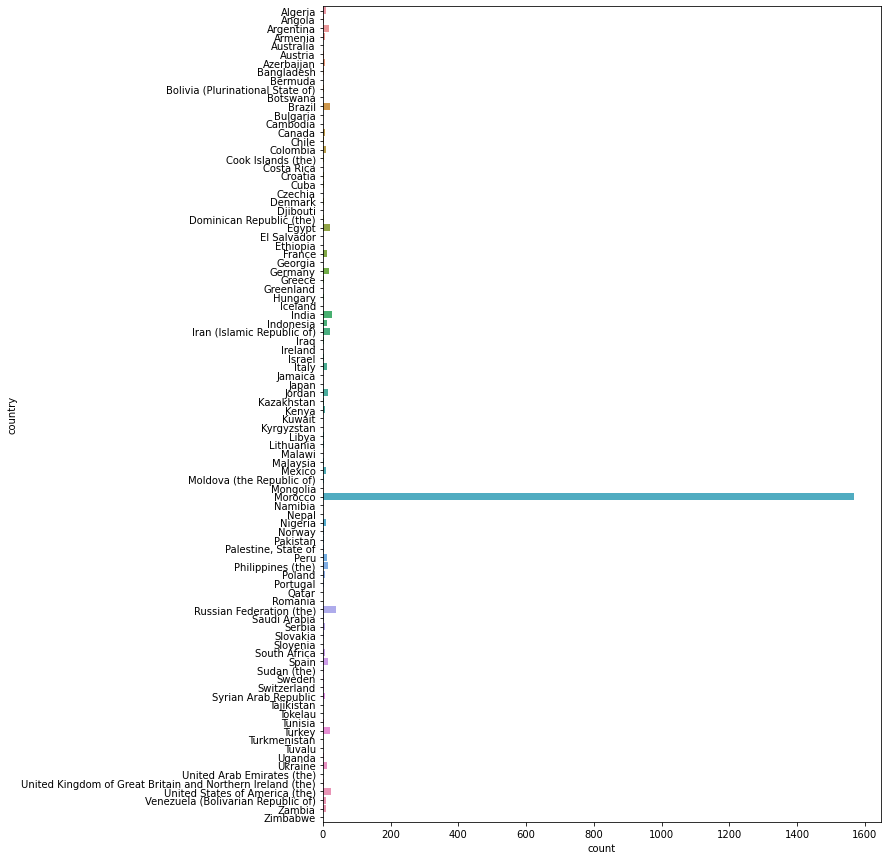

In [ ]:
# for clarification
# if we include morocco
plt.figure(figsize=(10,15))
sns.barplot(x='count',y='country',data=data1)

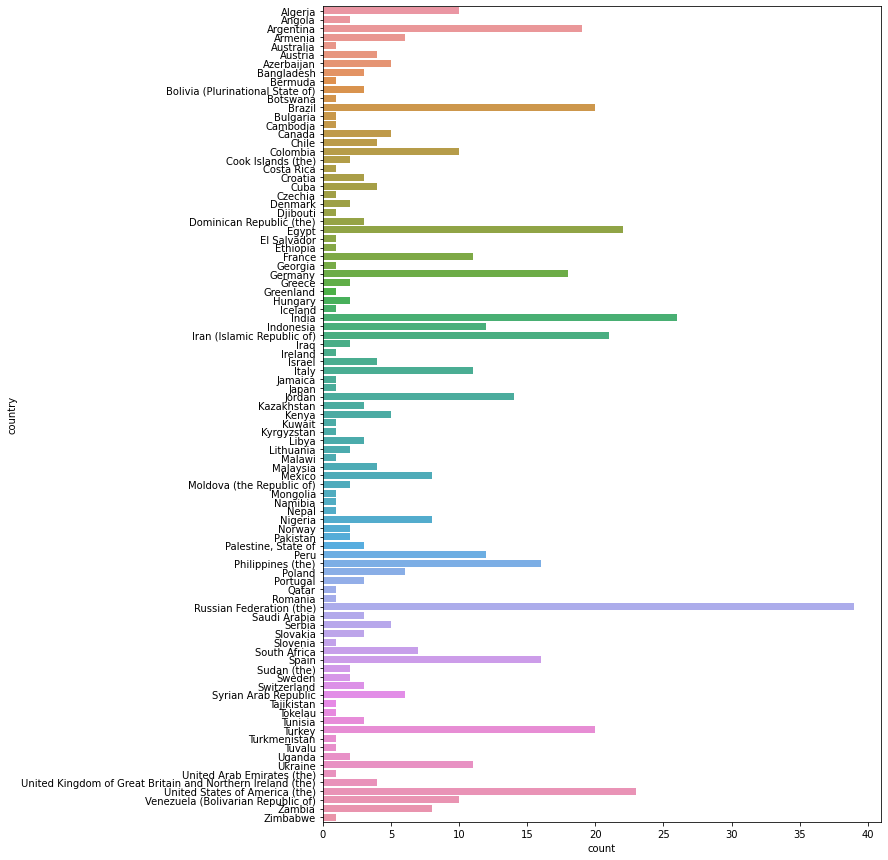

In [ ]:
# if we exclude morocco
plt.figure(figsize=(10,15))
data1=data1[data1.country!='Morocco']
sns.barplot(x='count',y='country',data=data1)